# Midterm PHYS248

Mar 3, 2022

---
This is an _open-internet_ exam. You are not allowed to communicate through any means with anybody during the exam. If you use code fragments from a resource on the internet make it clear what the source is in a comment line. If you use code from your own repository also make it clear from where exactly the code comes that you are using.

Copy this notebook to your own `phys248` repository into your `Exam-Assignment-Quiz` folder and add/commit to your repository. Answer all questions in this (your copy of the) notebook.  Once you have initial and partial results do commit and push to the remote. Do that frequently so that you do not enter into a crunch at the end. The deadline will be 12:50pm sharp, and any changes after that will be ignored. For students with accommodation their deadline is extended accordingly.

At the end make sure that all cells in your notebook execute correctly by restarting the kernel and running the notebook one more time from beginning to end. 

---

In [1]:
%pylab ipympl

Populating the interactive namespace from numpy and matplotlib


## Problem 1
### 1.1
The list `string` is defined as follows:
```Python
strings = ['ap', 'bcd', ['efgaCij','klm'],'noprqrst','uvwx','yhz']
```
If an index combination exists for a given letter it will return that letter when used to slice the list `strings`. For example, the index compination 0,1 returns the letter `b`. Write a code cell that will find and print all index combinations of `strings` for all characters in the target word _metaphorical_. Each answer line starts with the respective character of the target word. For example, the correct first line for this answer looks like this:
```
m 2 1 2
```
Test your answer by using the index pairs or triples found to create the letters of the target word, e.g. _m_ is `strings[2][1][2]`.

In [6]:
strings = ['ap', 'bcd', ['efgaCij','klm'],'noprqrst','uvwx','yhz']
word = 'metaphorical'
res = []

for l in word:
    ls = [l]
    for i in range(len(strings)):
        if type(strings[i])==str:
            for j in range(len(strings[i])):
                if strings[i][j] == l:
                    ls.append(i)
                    ls.append(j)
        else:
            for j in range(len(strings[i])):
                for k in range(len(strings[i][j])):
                    if strings[i][j][k] == l:
                        ls.append(i)
                        ls.append(j)
                        ls.append(k)
    res.append(ls)
print(res)


[['m', 2, 1, 2], ['e', 2, 0, 0], ['t', 3, 7], ['a', 0, 0, 2, 0, 3], ['p', 0, 1, 3, 2], ['h', 5, 1], ['o', 3, 1], ['r', 3, 3, 3, 5], ['i', 2, 0, 5], ['c', 1, 1], ['a', 0, 0, 2, 0, 3], ['l', 2, 1, 1]]


### 1.2
Add the bash commands needed to solve each of the tasks below into a code cell that starts with the magic command `%%bash`. You. may want to find those command by working on the terminal first. 

1. Download the _INTRODUCTION TO THE METAPHYSIC OF MORALS_ by Immanuel Kant which can be found at this location, `http://www.textfiles.com/etext/AUTHORS/KANT/i-m_of_m.txt` using the appropriate terminal command. 
2. Find all lines that contain the string `moral` and save them in the file `moral.txt`.
3. Use a combination of the `head` and `tail` command to print the 7th line of the file `moral.txt`.
4. Using shell commands determine how many words are on all lines combined that contain the string _moral_ in the file `i-m_of_m.txt`.
5. Replace in the file `moral.txt` all occurrences of the string `moral` with the string `mortal` and save this change to a file with the name `mortal.txt`.

In [ ]:
wget http://www.textfiles.com/etext/AUTHORS/KANT/i-m_of_m.txt
grep moral i-m_of_m.txt > moral.txt
head -7 moral.txt | tail -1
grep moral i-m_of_m.txt | wc -c
sed moral mortal > mortal.txt

### 1.3

You are given a list of fruit `list_of_fruit = ['pear','aubergine','tomato','orange']` and an index list `ind = [2,1,0,0]`. Create an empty string `name` and then, using `zip` add for each pair-wise entries of `list_of_fruit` and `ind` the character of the fruit indicated by the index in `ind`. What is the resulting name?


In [4]:
list_of_fruit = ['pear','aubergine','tomato','orange']
ind = [2,1,0,0]
name = ''
for i, j in zip(list_of_fruit, ind):
    name+=i[j]
print('resulting name: {}'.format(name))

resulting name: auto


## Problem 2
The binomial coefficient 
$$
{{N}\choose{k}}  =  \frac{N!}{(N-k)! k!}
$$ 
is the number of ways of picking $k$ unordered outcomes from $N$ possibilities, for non-negative integers and $0\leq k \leq N$ and 
$$
{{N}\choose{k}} = 0 
$$
otherwise. $k!$ is the factorial:  $k! = k (k-1) (k-2) \dots 2 \cdot 1$ and 0! = 1.

### 2.1 

Write a function called `my_factorial` that takes an integer number as input and returns the factorial. Check that the function works by comparing its output with that of the `factorial` function from the `math` module. 

In [9]:
import math

def my_factorial(n):
    if n == 0:
        return 1
    res = 1
    for i in range(1, n+1):
        res *= i
    return res

# factorial computation using user defined function
print(my_factorial(5))
# comparison with math module
math.factorial(5)

120


120

### 2.2 

Write a function `my_binomial` that takes $N$ and $k$ as input and returns the binomial coefficient. You would pass the function `my_factorial` as an optional function argument, like this: 

```Python
def my_binomial(n,k,factorial=my_factorial):
```

Find a library implementation of the binomial coefficient and use that to verify your function.

In [16]:
import math

def my_factorial(n):
    res = 1
    for i in range(1, n+1):
        res *= i
    return res

def my_binomial(n,k,factorial=my_factorial):
    numerator = my_factorial(n)
    denominator = my_factorial(n-k)*my_factorial(k)
    return numerator/denominator
# computation using user defined function
print('Binomial coefficient: {}'.format(my_binomial(5, 3, my_factorial)))
# using library to verify the function
print('Binomial coefficient using math library: {}'.format(math.factorial(5)/(math.factorial(2)*math.factorial(3))))

Binomial coefficient: 10.0
Binomial coefficient using math library: 10.0


### 2.3

Evaluate the binomial coefficient for $N \in [0 \dots 10]$ and $k \in [0 \dots 10]$. Store the values in a variable named `z`.

In [63]:
z = []

def my_factorial(n):
    res = 1
    for i in range(1, n+1):
        res *= i
    return res

def my_binomial(n,k,factorial=my_factorial):
    numerator = my_factorial(n)
    denominator = my_factorial(n-k)*my_factorial(k)
    return numerator/denominator

for i in range(11):
    for j in range(i+1):
        z.append(my_binomial(i, j, my_factorial))
print(z)

[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0, 3.0, 1.0, 1.0, 4.0, 6.0, 4.0, 1.0, 1.0, 5.0, 10.0, 10.0, 5.0, 1.0, 1.0, 6.0, 15.0, 20.0, 15.0, 6.0, 1.0, 1.0, 7.0, 21.0, 35.0, 35.0, 21.0, 7.0, 1.0, 1.0, 8.0, 28.0, 56.0, 70.0, 56.0, 28.0, 8.0, 1.0, 1.0, 9.0, 36.0, 84.0, 126.0, 126.0, 84.0, 36.0, 9.0, 1.0, 1.0, 10.0, 45.0, 120.0, 210.0, 252.0, 210.0, 120.0, 45.0, 10.0, 1.0]


### 2.4 
Make a 2D heatmap using `imshow` of $\sqrt{z}$ with respect to both $N$ and $k$. Then, do the same with a `contour` plot.

In [67]:
from PIL import Image as im
import matplotlib.pyplot as plt
import numpy as np
z = []
def my_factorial(n):
    res = 1
    for i in range(1, n+1):
        res *= i
    return res

def my_binomial(n,k,factorial=my_factorial):
    numerator = my_factorial(n)
    denominator = my_factorial(n-k)*my_factorial(k)
    return numerator/denominator

for i in range(11):
    for j in range(i+1):
        z.append(my_binomial(i, j, my_factorial))
z = np.array(z)
z = np.sqrt(z)
n = np.linspace(1, 10, 10)
k = n
X, Y = np.meshgrid(n, k)
    
#plt.contour(X, Y, z)
#plt.title('contour plot')
#plt.show()

## Problem 3

The one-dimensional equation of motion of a ball with an initial velocity $v_\mathrm{0}$ in the positive direction (up) is given by
$$
y_\mathrm{b} = -\frac{1}{2}gt^2 + v_\mathrm{0} t 
$$
This equation gives the height of the ball for a given time, which represents the time passed since the ball has been thrown in the upward direction.

**Variables:**
```Python
g = 9.81    # m s^-2
v0  = 13.4  # m s^-1
```

### 3.1
Write a code cell that evaluates the mathematical expression for $y_\mathrm{b}$ for 61 equally spaced times from $0$ to $3$ ($t \in [0.,3.]$, unit of time is s). Save the t and $y_\mathrm{b}$ values in the arrays `times` and `yb`. Avoid using a loop.

In [21]:
import numpy as np

g = 9.81    # m s^-2
v0  = 13.4  # m s^-
times = np.linspace(0, 3, 62)
yb = (-1/2)*g*(times**2)+v0*times

### 3.2 
Make a line plot of $y_\mathrm{b}(t)$ and of the velocity as the numerical derivative of `yb` as well as the acceleration as the second derivative of `yb` wrt `times`. 

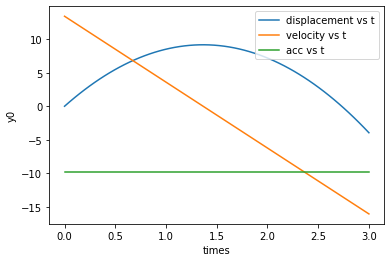

In [38]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81    # m s^-2
v0  = 13.4  # m s^-
times = np.linspace(0, 3, 62)
yb = (-1/2)*g*(times**2)+v0*times
acc = np.linspace(1, 1, 62)*-g

def der(times, g, v0):
    velocity = -1*g*times+v0
    return velocity

# compute velocity
v = der(times, g, v0)

plt.xlabel('times')
plt.ylabel('y0')
# yb wrt times
plt.plot(times, yb, label='displacement vs t')
# velocity vs times
plt.plot(times, v, label='velocity vs t')
# second derivative
plt.plot(times, acc, label='acc vs t')
plt.legend()
plt.show()

### 3.3
* Find the time for which the maximum height of the ball is reached by determining from the calculated arrays the root of the velocity. Don't use a loop.
* Determine when the ball hits the ground again, by finding when `yb` becomes less than zero. Don't use a loop.

In [56]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81    # m s^-2
v0  = 13.4  # m s^-
times = np.linspace(0, 3, 62)
yb = (-1/2)*g*(times**2)+v0*times
acc = np.linspace(1, 1, 62)*-g

def der(times, g, v0):
    velocity = -1*g*times+v0
    return velocity

# compute velocity
v = der(times, g, v0)

# find max height of the ball
ind = np.where(yb==yb.max())[0][0]
maxHeight = yb[ind]
print('max height: {} m'.format(maxHeight))

# find when yb < 0
ind2 = np.where(yb < 0)[0][0]
t = times[ind2]
print('yb < 0 at: {} sec'.format(t))

max height: 9.151281913464123 m
yb < 0 at: 2.7540983606557377 sec
